<a href="https://colab.research.google.com/github/IROHA0508/Machine_Learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EB%9F%AC_TrainAndTestSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#혼자 공부하는 머신러닝 + 딥러닝

##2. 훈련 세트와 테스트 세트
### Data : https://www.kaggle.com/aungpyaeap/fish-market
#### 목적 : 기존의 코드의 문제점을 파악하고 훈련 세트와 테스트 세트를 이용해서 알고리즘 훈련  

주어진 데이터로 학습을 한 다음 -> 그 데이터를 가지고 검증을 한다면 당연히 정확도는 100%일 것  

따라서 주어진 데이터와 이를 토대로 학습한 알고리즘을 테스트 하는 데이터는 달라야 한다!!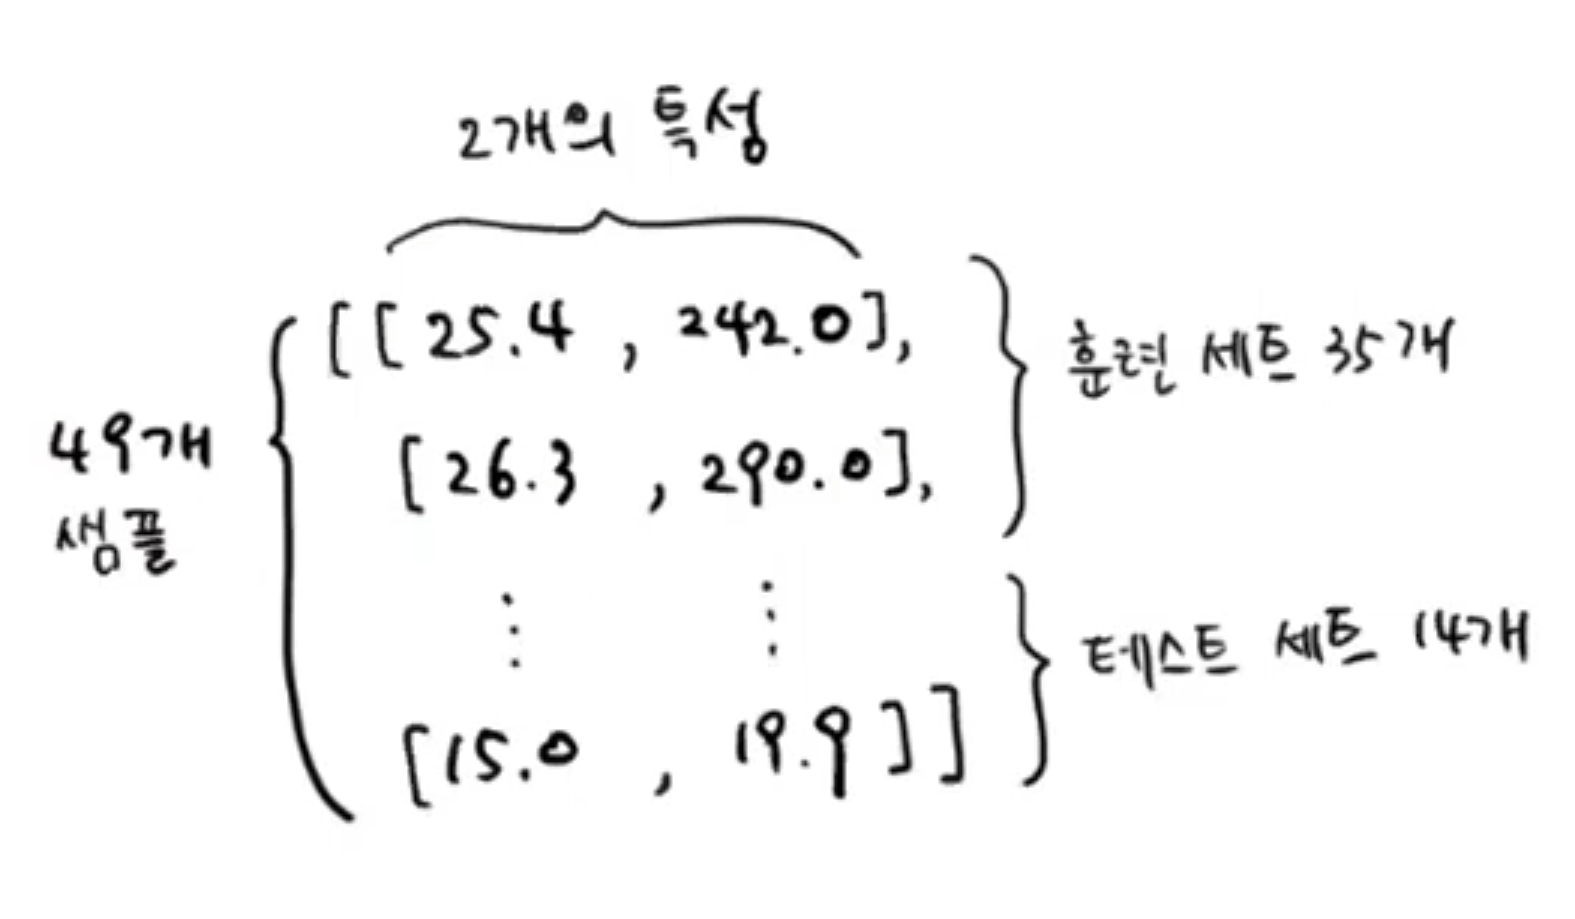

In [ ]:
# 도미의 정보

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
# 빙어의 정보

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 두개의 데이터를 하나의 데이터로 합치기
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

print(fish_length)
print(fish_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
# 이 데이터를 scikit_learn에서 사용하기 위해 2차원 리스트로 생성
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

print(fish_data)
print(fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


이때 생성되는 하나의 생선 데이터를 샘플이라고 함  
여기서 하나의 샘플은 (생선의 길이, 생선의 무게)의 구조를 가짐  
  
이 데이터에서 35개를 훈련 세트, 14개를 데이터 세트로 이용할 예정

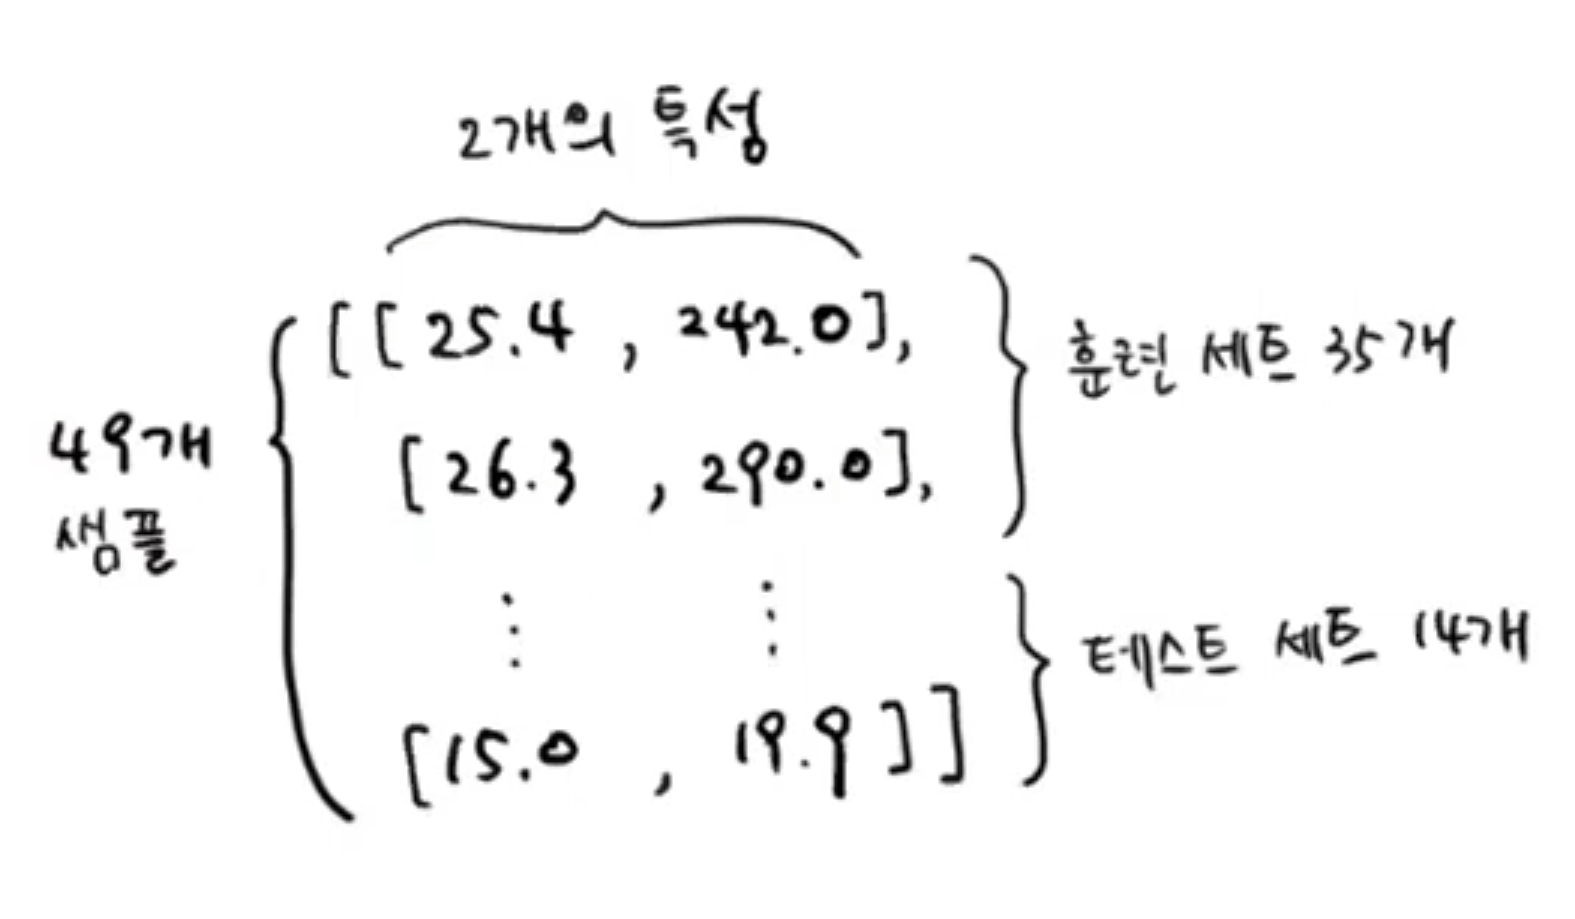

일단 사이킷런의 KNeighborsClassifier를 import하고 클래스 생성

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# 해당 클래스의 객체 생성
kn = KNeighborsClassifier()

In [9]:
# 5개의 data만 슬라이싱해서 출력 확인

print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [12]:
# train set으로 0~34번 까지 사용
train_input = fish_data[:35]

# train set으로 target 중에서 0~34번 까지 사용
train_target = fish_target[:35]

# test set으로 나머지 사용
test_input = fish_data[35:]

# test set으로 target 중에서 나머지 사용
test_target = fish_target[35:]


In [13]:
# 생성한 train set을 이용해서 fit() 메소드를 사용해 모델을 훈련 시긴다
kn = kn.fit(train_input, train_target)

# 이후 score()을 이용해서 test set에 대해 모델 평가
kn.score(test_input, test_target)

0.0

여기서 문제점은 도미의 데이터로 훈련하고 -> 빙어의 데이터로 테스트를 했다는 것!!  
Train Set 과 Test Set을 구성할 때는 데이터들을 무작위적으로 섞은 후에 구성해야 한다!!  

이렇게 샘플이 골고루 섞여 있지 않은 경우를 샘플링이 한쪽으로 치우쳤다는 의미로 **샘플링 편향**이라고 한다

####Numpy 라이브러리  
Numpy는 고차원의 배열을 손쉽게 만들고 조작할 수 있다는 장점이 있다.

In [14]:
import numpy as np

# 파이썬 리스트를 numpy 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)


# numpy 배열을 출력하면 차원을 구분하귀 쉽도록 2차원 배열의 형태로 출력해줌 -> 이는 파이썬 리스트의 출력과는 다른점!!
print(input_arr)
print(target_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
# numpy 배열의 shape을 확인
print(input_arr.shape)
print(target_arr.shape)

(49, 2)
(49,)


이제 랜덤하게 샘플을 선택해서 Train Set 과 Test Set 을 생성해야함!!  
배열을 섞고 나서 선택하는 방법 보다 무작위로 샘플을 고르는 방법을 선택함  
  
이때 주의해야 할 점은 input_arr와 target_arr에서 같은 위치는 함께 선택되어야 한다  
따라서, index 값을 기억해야 할 필요가 있다

In [20]:
# numpy의 arange() 함수를 이용해서 index를 생성하고 random 함수를 이용해서 섞는다
# arange(N) 함수는 0~N-1까지 1씩 증가하는 배열을 만들어준다
# shuffle() 함수는 주어진 배열을 무작위로 섞는다

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


이렇게 선택된 index를 기반으로 train set 과 test set을 선택

In [21]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(train_input)
print(train_target)

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


In [22]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(test_input)
print(test_target)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


Train Set 과 Test Set이 랜덤하게 잘 뽑혔는지 확인하기 위해서 그래프로 확인!

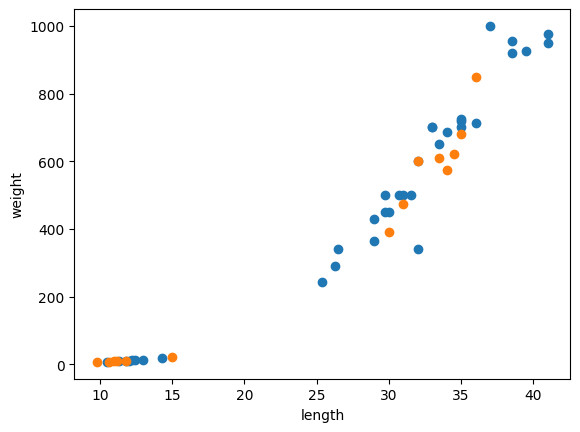

In [23]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위의 그래프를 바탕으로 데이터들이 무작위적으로 섞인 것을 확인할 수 있다  
이를 기반으로 다시 모델을 학습시켜보자

In [25]:
# 새로운 모델을 만들어야 하지만 여기서는 그냥 기존의 모델을 다시 학습시키기

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [26]:
# 학습된 모델을 기반으로 predict 메소드를 사용해서 test_input 에 대한 답을 예측하기

kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [27]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])